In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#memasukan data latih
datalatih = pd.read_excel("Data B atau T.xlsx")
datalatih.head(11)
#Prestasi Siswa = 1 == Ya 
#Prestasi Siswa = 2 == Tidak
#Prestasi Sekolah = 1 == Cukup
#Prestasi Sekolah = 2 == Baik

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi
0,Matematika,92,86.0,88,Berprestasi
1,Matematika,90,86.0,85,Berprestasi
2,Sastra Inggris,82,87.0,92,Tidakberprestasi
3,Matematika,93,82.0,85,Berprestasi
4,Sastra Inggris,86,85.0,88,Berprestasi
5,Matematika,91,83.0,84,Berprestasi
6,Sastra Indonesia,88,80.0,90,Tidakberprestasi
7,Sastra Indonesia,84,82.0,88,Tidakberprestasi
8,Sastra Inggris,79,89.0,85,Tidakberprestasi
9,Sastra Inggris,83,88.0,81,Tidakberprestasi


In [40]:
datalatih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Jurusan           69 non-null     object 
 1   Matematika        69 non-null     int64  
 2   Bahasa Inggris    68 non-null     float64
 3   Bahasa Indonesia  69 non-null     int64  
 4   Prestasi          69 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ KB


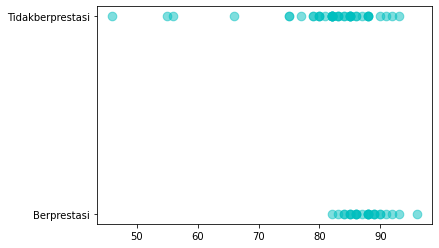

In [87]:
from sklearn.cluster import KMeans
#Memvisualkan persebaran data
plt.scatter(datalatih.Matematika, datalatih.Prestasi, s = 75, c = "c", marker = "o", alpha = 0.5)
plt.show()

In [88]:
x = datalatih.drop(["Prestasi"], axis=1)
x.head(11)

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia
0,Matematika,92,86.0,88
1,Matematika,90,86.0,85
2,Sastra Inggris,82,87.0,92
3,Matematika,93,82.0,85
4,Sastra Inggris,86,85.0,88
5,Matematika,91,83.0,84
6,Sastra Indonesia,88,80.0,90
7,Sastra Indonesia,84,82.0,88
8,Sastra Inggris,79,89.0,85
9,Sastra Inggris,83,88.0,81


In [76]:
y = datalatih["Prestasi"]
y.head(11)

0          Berprestasi
1          Berprestasi
2     Tidakberprestasi
3          Berprestasi
4          Berprestasi
5          Berprestasi
6     Tidakberprestasi
7     Tidakberprestasi
8     Tidakberprestasi
9     Tidakberprestasi
10    Tidakberprestasi
Name: Prestasi, dtype: object

In [78]:
from sklearn.model_selection import train_test_split
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("Data.xlsx")
datauji.head(11)

ValueError: could not convert string to float: 'Matematika'

In [50]:
x_test = datauji.drop(["Jurusan"], axis=1)
x_test.head(11)

NameError: name 'datauji' is not defined

In [10]:
y_uji = datauji["Jurusan"]
y_uji.head(11)

0          Matematika
1          Matematika
2      Sastra Inggris
3    Sastra Indonesia
4      Sastra Inggris
5    Sastra Indonesia
Name: Jurusan, dtype: object

In [17]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Matematika' 'Matematika' 'Sastra Indonesia' 'Sastra Indonesia'
 'Sastra Inggris' 'Sastra Indonesia']


In [16]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.8333333333333334


In [12]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

                  precision    recall  f1-score   support

      Matematika       1.00      1.00      1.00         2
Sastra Indonesia       0.67      1.00      0.80         2
  Sastra Inggris       1.00      0.50      0.67         2

        accuracy                           0.83         6
       macro avg       0.89      0.83      0.82         6
    weighted avg       0.89      0.83      0.82         6

